In [1]:
import pandas as pd
import numpy as np
dataset=pd.read_csv('petrol_consumption.csv')
dataset.head(2)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524


In [3]:
dataset['Petrol_Consumption'].mean()

576.7708333333334

In [4]:
X=dataset.drop('Petrol_Consumption',axis=1)
y=dataset['Petrol_Consumption']


In [6]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=20,random_state=0)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)


In [7]:
from sklearn import metrics
print("Mean Absolute Error ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error  51.76500000000001
Mean Squared Error 4216.166749999999
Root Mean Squared Error 64.93201637097064


With 20 trees, the root mean squared error is 64.93 which is greater than  10 percent of the average petrol consumption 
( i.e. 10% of 576.77 = 57.67). This indicate, that our ML model is not fine.

In [8]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=200,random_state=0)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)   

from sklearn import metrics
print("Mean Absolute Error ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error  48.124500000000005
Mean Squared Error 3497.802072500001
Root Mean Squared Error 59.142219035981405


With 200 trees, the root mean squared error is 59.14 which is greater than  10 percent of the average petrol consumption 
( i.e. 10% of 576.77 = 57.67). This indicate, that our ML model still not fine .But better compare with 20 trees.

Random Forest Classification

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [27]:
bankdata=pd.read_csv("bill_authentication.csv")
print(bankdata.shape)
print("=========")
print(bankdata.head(2))
                     

(1372, 5)
   Variance  Skewness  Curtosis  Entropy  Class
0    3.6216    8.6661   -2.8073 -0.44699      0
1    4.5459    8.1674   -2.4586 -1.46210      0


In [29]:
X=bankdata.drop('Class',axis=1)
y=bankdata['Class']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=20,random_state=0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)


from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[155   2]
 [  1 117]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9890909090909091


Analysis : The accuracy achieved for by our random forest classifier with 20 trees is 99% ( which is great !!).Now try with 10 and 50 estimators.

Q)  How do I get the best value of the estimators ? [remember : its not always best to have higher no. of estimators?]
[ Becoz higher no. of estimators means more trees , which means more time. ]

In [33]:
error=[]
for i in range(10,201,10):
    classifier=RandomForestClassifier(n_estimators=i,random_state=100)
    classifier.fit(X_train,y_train)
    pred_i=classifier.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

AttributeError: module 'numpy' has no attribute 'arrange'

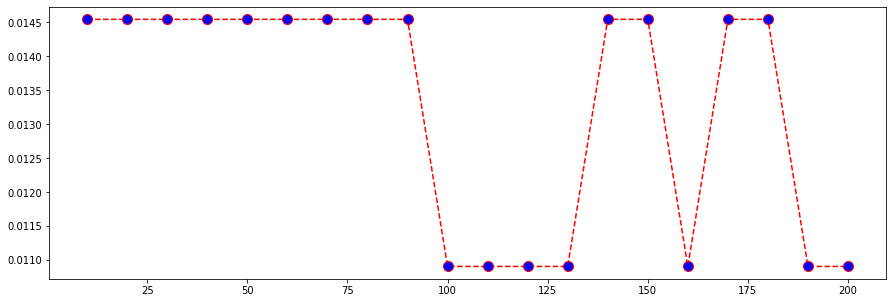

In [36]:
plt.figure(figsize=(15,5))
plt.plot(range(10,201,10),error,color='red',linestyle='dashed' , marker='o',markerfacecolor='blue',markersize=10)
plt.xticks(np.arrange(10,201,step=10))
plt.title('Error Rate n_estimator Value')
plt.xlabel('n_estimators')
plt.ylabel('Mean Error');